Importing Libreries

In [213]:
"""
Description:
    Solving and analyzing the problem of diabetic patients by clustering and classification method
    "Diabetes 130-US hospitals for years 1999-2008 Data Set"
    Project for Amirkabir University of Technilogy (Tehran Polytechnic)
    Computer Scince department
    Artificial Inteligence Course

Student Name & ID: Pouria Alimoradpor 9912035
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, silhouette_samples, pairwise_distances, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

Read Data (csv file)

In [214]:
df = pd.read_csv("../Data/dataset_diabetes/diabetic_data.csv")

In [215]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

Pre-Processing

In [217]:
# Replace by NaN
for d in ['?', 'Other', 'Unknown/Invalid']:
    df.replace(d, np.nan, inplace=True)
# Drop irrelevant columns
df.drop(['encounter_id', 'patient_nbr', 'payer_code', 'weight', 'medical_specialty'], axis=1, inplace=True)
# Drop columns with more than 40% missing values
df.dropna(thresh=len(df)*0.6, axis=1, inplace=True)
# Drop rows with missing values
df.dropna(inplace=True)

In [219]:
# Checking null values, if any
df.isnull().values.any() 

False

In [218]:
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == np.nan].count())

race 0
gender 0
age 0
diag_1 0
diag_2 0
diag_3 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


Data-Visualization

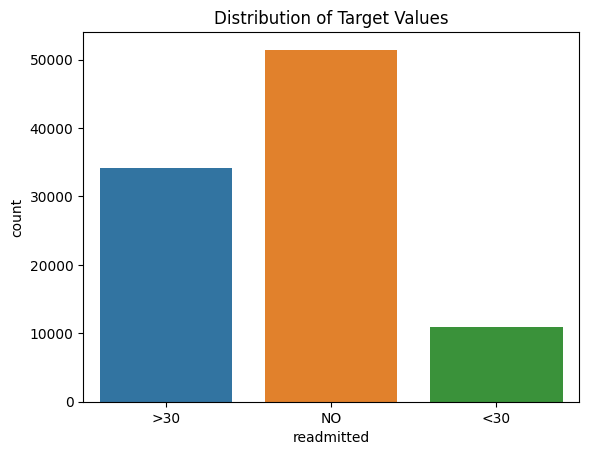

<AxesSubplot: >

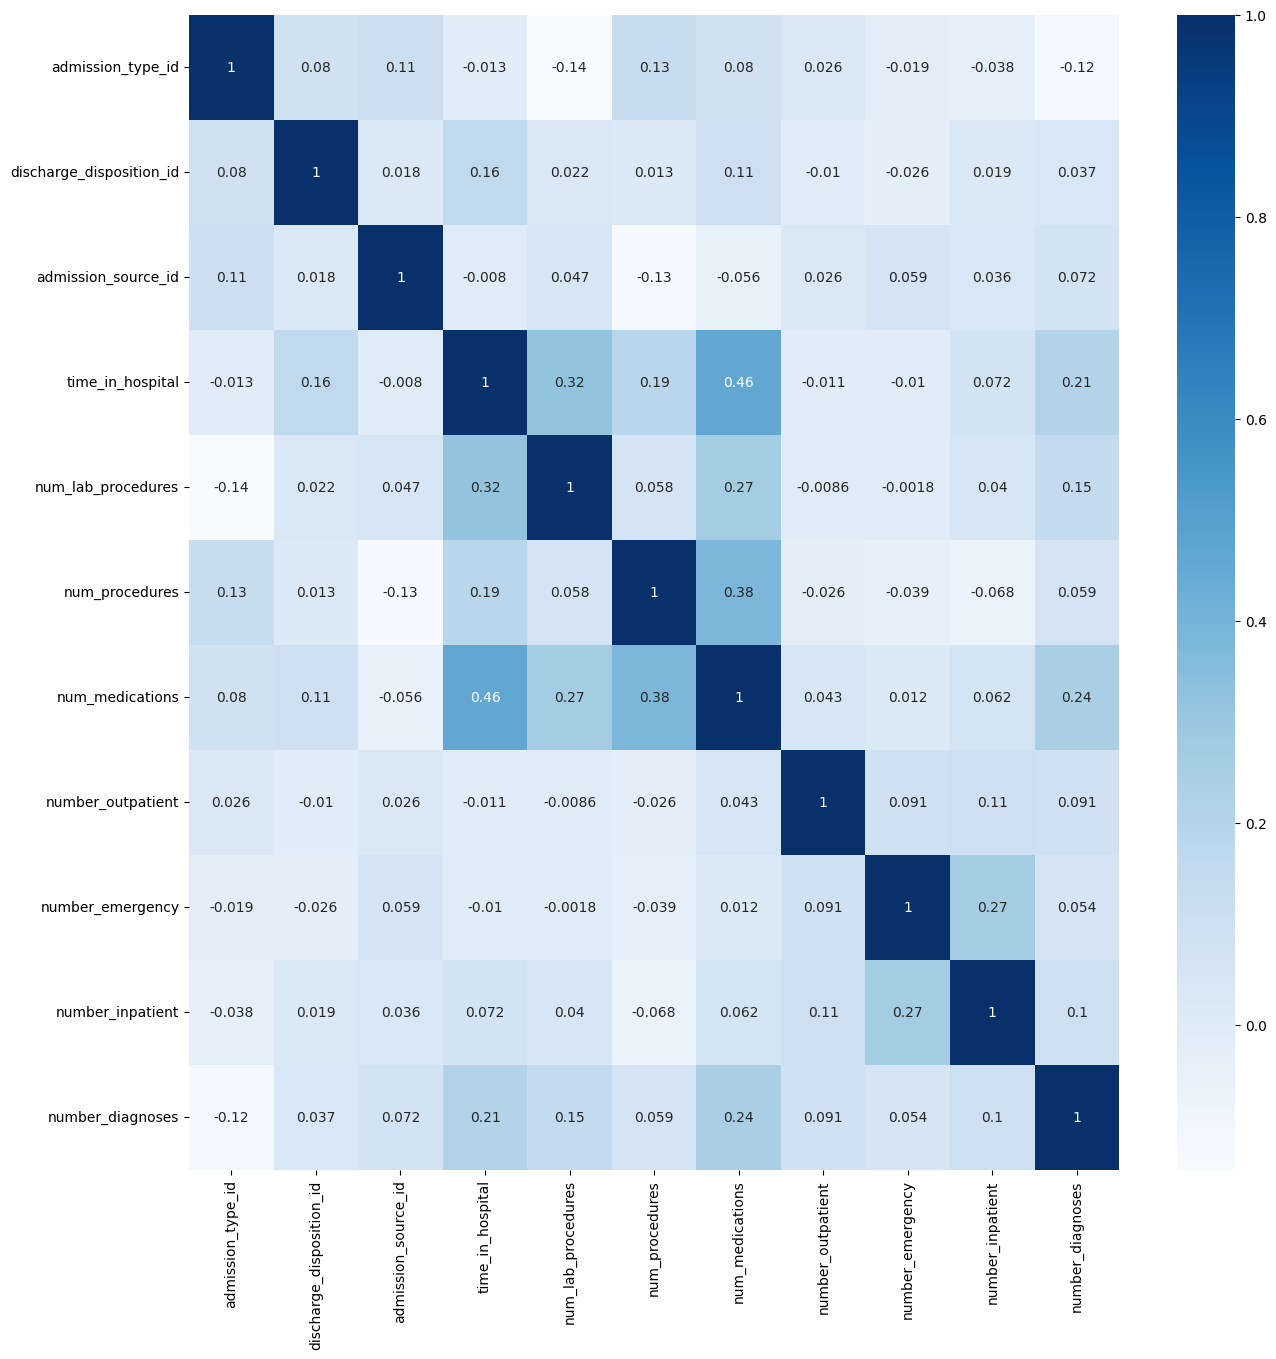

In [220]:
sns.countplot(x = "readmitted", data = df)
plt.title("Distribution of Target Values")
plt.show()

plt.figure(figsize=(15,15))
sns.heatmap(df.corr(numeric_only=True), cbar=True, annot=True, cmap='Blues')

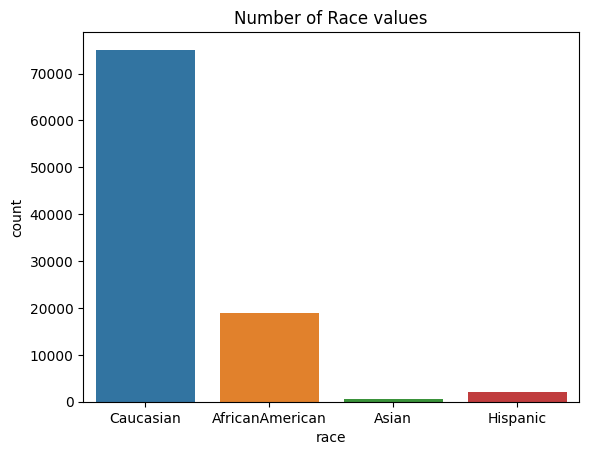

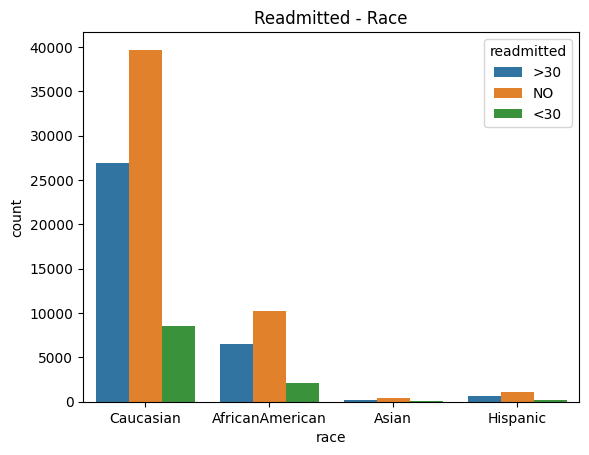

In [221]:
# Race
sns.countplot(x = "race", data = df)
plt.title("Number of Race values")
plt.show()

sns.countplot(x = "race", hue= "readmitted", data = df)
plt.title("Readmitted - Race")
plt.show()

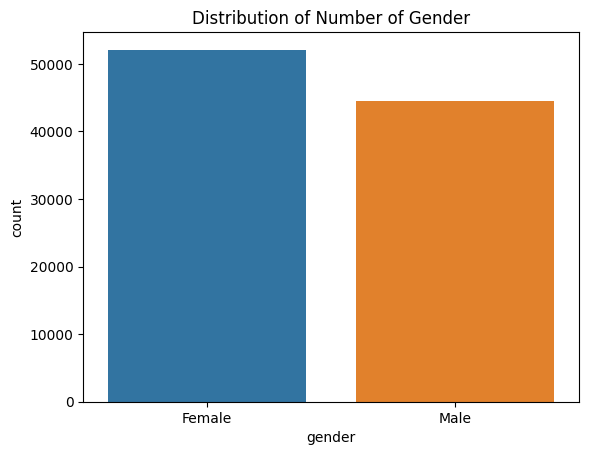

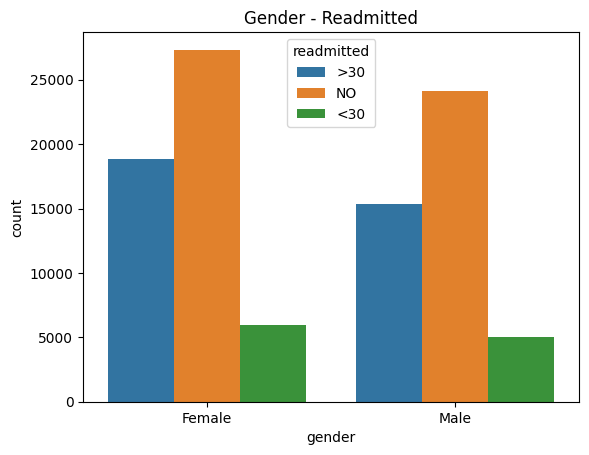

In [222]:
# Gender
sns.countplot(x = "gender", data = df)
plt.title("Distribution of Number of Gender")
plt.show()

sns.countplot(x = "gender", hue = "readmitted", data = df)
plt.title("Gender - Readmitted")
plt.show()

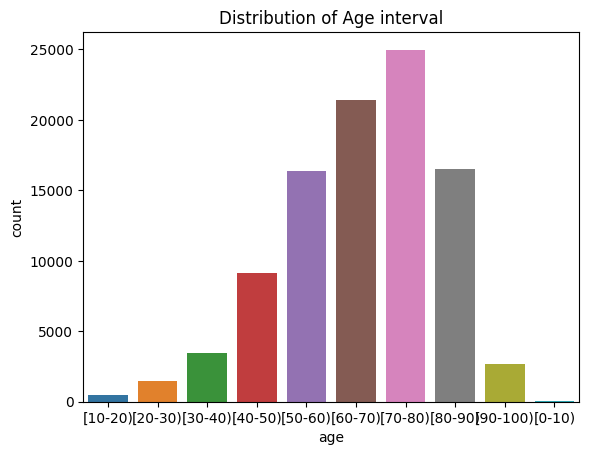

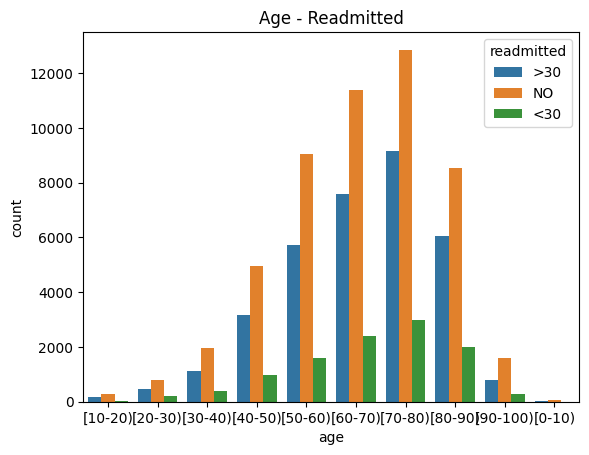

In [223]:
# Age
sns.countplot(x = "age", data = df)
plt.title("Distribution of Age interval")
plt.show()

sns.countplot(x = "age", hue = "readmitted", data = df)
plt.title("Age - Readmitted")
plt.show()

Split Data

In [224]:
# Split data into training and testing sets
X = df.drop('readmitted', axis=1)
y = df['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# Preprocess data using standard scaling

Classify

In [225]:
# Train KNN classifier on the data
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
# Evaluate model on the testing set
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

ValueError: could not convert string to float: 'Caucasian'

Cluster

In [ ]:
# Perform clustering using k-means algorithm
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train_scaled)
# Add cluster labels to the original dataframe
df['cluster'] = kmeans.labels_
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='num_lab_procedures', hue='cluster', data=df)
plt.xlabel('Age')
plt.ylabel('Number of Lab Procedures')
plt.title('K-means Clustering')
plt.show()


NameError: name 'X_train_scaled' is not defined